 <a name="introduction"></a>
# 1. Introduction

This is a project that I started in school and am still working on right now. Since there are thousands of Japanese characters, this project will take a long time to complete.

The purpose of this project is to train a neural network to recognize handwritten Japanese characters.

I've started with the 46 character Hiragana alphabet, but I plan to move on to Kanji next.



<a name='data_description'></a>
**Description of the data:**

- 14 sets of 46 characters drawn by myself
- 9 sets of 46 characters drawn by others

In [1]:
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import matplotlib.cm
import math
from sklearn.preprocessing import OneHotEncoder
import sys
import time
%matplotlib inline 

 <a name="loadingimages1"></a>
# 2. Loading in Images

In [2]:
# labels of the Japanese characters
labels = ['a', 'i', 'u', 'e', 'o',
         'ka', 'ki', 'ku', 'ke', 'ko', 
         'sa', 'shi', 'su', 'se', 'so',
         'ta', 'chi', 'tsu', 'te', 'to',
         'na', 'ni', 'nu', 'ne', 'no',
         'ha', 'hi', 'fu', 'he', 'ho',
         'ma', 'mi', 'mu', 'me', 'mo',
         'ya', 'yu', 'yo',
         'ra', 'ri', 'ru', 're', 'ro',
         'wa', 'wo', 'n']

len(labels) # should be 46

46

<a name='loadingimages2'></a>
## 2.A Self-drawn Characters

In [3]:

# importing the self made written characters images
# also adding the label and one_hot_encoding of the label

input_folder_self = "C:/Users/reaso/OneDrive/Data Science Projects/Japanese Character Recognition/Japanese Images/Self Drawn Characters/"

#input_folder_self = ".../Japanese Images/Self Drawn Characters/"

df_self = pd.DataFrame(columns = ['label', 'image', 'resized_image', 'one_hot_label', 'numerical_image'])
for i in range(46):
    one_hot_self = [0.0 for k in range(len(labels))]
    one_hot_self[i] = 1.0
    for j in range(1, 15):
        df_self.loc[len(df_self), df_self.columns] = np.array([labels[i], # labels of each character
                                                    Image.open(input_folder_self + f'{labels[i]}{j}.png'), # original image
                                                    None, 
                                                    one_hot_self, # the label encoding (1.0 for that specific character, 0 otherwise)
                                                    None], dtype = object)                                               

In [4]:
df_self.head(20)

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
5,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
6,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
7,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
8,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
9,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None


In [5]:
# should be 14 of each character
df_self['label'].value_counts()

a      14
mo     14
ha     14
hi     14
fu     14
he     14
ho     14
ma     14
mi     14
mu     14
me     14
ya     14
i      14
yu     14
yo     14
ra     14
ri     14
ru     14
re     14
ro     14
wa     14
wo     14
no     14
ne     14
nu     14
ni     14
u      14
e      14
o      14
ka     14
ki     14
ku     14
ke     14
ko     14
sa     14
shi    14
su     14
se     14
so     14
ta     14
chi    14
tsu    14
te     14
to     14
na     14
n      14
Name: label, dtype: int64

In [6]:
# taking the sum of the average through the one_hot_encoded column
# should be 1/True
np.sum(np.average(df_self['one_hot_label'])) == 1.0

True

In [7]:
# Checking that there are 14 sets of the 46 characters
46*14 == len(df_self), len(df_self)

(True, 644)

<a name='loadingimages3'></a>
## 2.B Other Handwritten Characters

In [8]:
# importing the image files of characters written by other people
# also includes one set of printed characters (set 10)

input_folder_other = "C:/Users/reaso/OneDrive/Data Science Projects/Japanese Character Recognition/Japanese Images/Others Characters/"

#input_folder_other = ".../Japanese Images/Others Characters/"

df_other = pd.DataFrame(columns = ['label', 'image', 'resized_image', 'one_hot_label', 'numerical_image'])
for i in range(1, 10):
    for j in range(1, 47):
        one_hot_other = [0.0 for k in range(len(labels))]
        one_hot_other[j-1] = 1.0
        df_other.loc[len(df_other), df_other.columns] = np.array([labels[j-1], # labels of each character
                                                    Image.open(input_folder_other + f'{i}-{j}.png'), # original image
                                                    None,
                                                    one_hot_other, # the label encoding (1.0 for that specific character, 0 otherwise)
                                                    None], dtype = object)

In [9]:
df_other.head(20)

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,i,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,u,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,e,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,o,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",None
5,ka,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",None
6,ki,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",None
7,ku,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",None
8,ke,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",None
9,ko,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None


In [10]:
# should be 9 of each character
df_other['label'].value_counts()

a      9
mo     9
ha     9
hi     9
fu     9
he     9
ho     9
ma     9
mi     9
mu     9
me     9
ya     9
i      9
yu     9
yo     9
ra     9
ri     9
ru     9
re     9
ro     9
wa     9
wo     9
no     9
ne     9
nu     9
ni     9
u      9
e      9
o      9
ka     9
ki     9
ku     9
ke     9
ko     9
sa     9
shi    9
su     9
se     9
so     9
ta     9
chi    9
tsu    9
te     9
to     9
na     9
n      9
Name: label, dtype: int64

In [11]:
# Checking that there are 9 sets of the 46 characters
46*9 == len(df_other), len(df_other)

(True, 414)

In [12]:
# taking the sum of the average through the one_hot_encoded column
# should be 1/True
np.sum(np.average(df_other['one_hot_label'])) == 1.0

False

In [13]:
# this is essentially 1, but we can still double check
np.sum(np.average(df_other['one_hot_label']))

0.9999999999999998

In [14]:
# no results, so everything was calculated correctly
for i in range(len(df_other)):
    if np.sum(df_other.loc[i, 'one_hot_label']) < 1.0:
        print(i)

<a name='prepare1'></a>
# 3. Preparing the Images

<a name='prepare2'></a>
## 3.A Testing on one character first

In [15]:
# before lowering resolution
image = df_self['image'][0]

print(f'Image details')
print(f'Format {image.format}')
print(f'Size {image.size}')
print(f'Mode {image.mode}')

Image details
Format PNG
Size (1280, 1280)
Mode RGBA


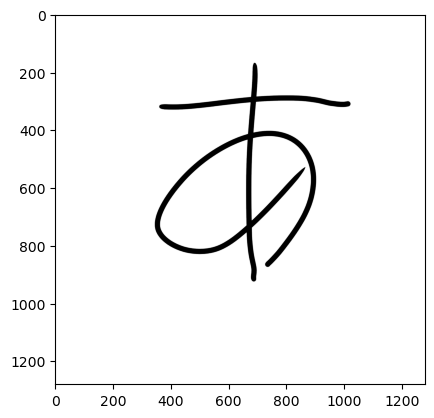

In [16]:
# converting image into strictly black-and-white
bw_image = image.convert("L") #L is 8-bit black-and-white image mode
plt.imshow(bw_image, cmap=plt.cm.Greys_r);

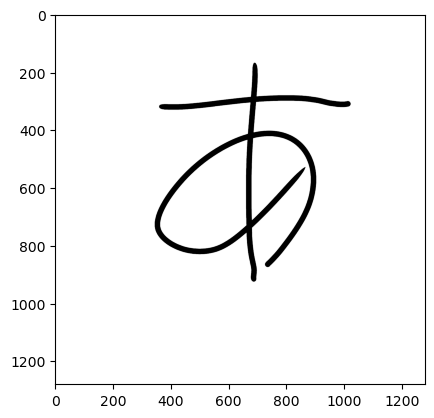

In [17]:
# enhancing image, can come back to this to see if performace improves
bw_image2 = ImageEnhance.Contrast(bw_image).enhance(2)
plt.imshow(bw_image2, cmap=plt.cm.Greys_r);

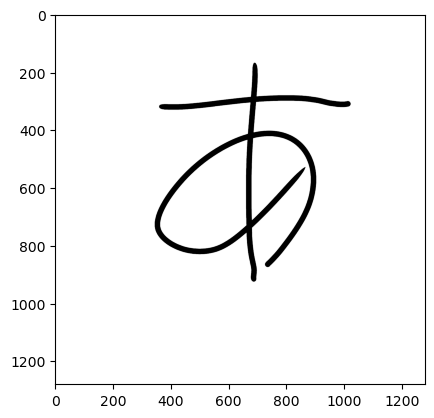

In [18]:
# seeing the image in black and white instead of the colorscale that matplotlib has as a default

plt.imshow(bw_image2, cmap=plt.cm.Greys_r);

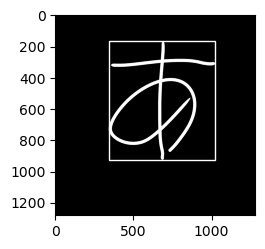

In [19]:
# recenter and resize image so all images are the same orientation

# Invert sample
inv_sample = ImageOps.invert(bw_image2)
bbox = inv_sample.getbbox()

fig = plt.figure(figsize=(2, 2))
ax = fig.add_axes([0,0,1,1])

ax.imshow(inv_sample, cmap=plt.cm.Greys_r)
rect = patches.Rectangle(
    (bbox[0], bbox[3]), bbox[2]-bbox[0], -bbox[3]+bbox[1]-1,
    fill=False, alpha=1, edgecolor='w')
ax.add_patch(rect)
plt.show()

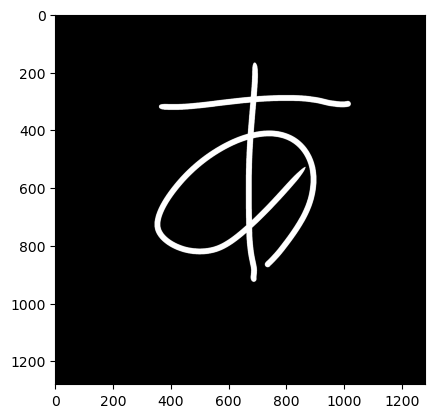

In [20]:
# inverted img
plt.imshow(inv_sample, cmap=plt.cm.Greys_r);

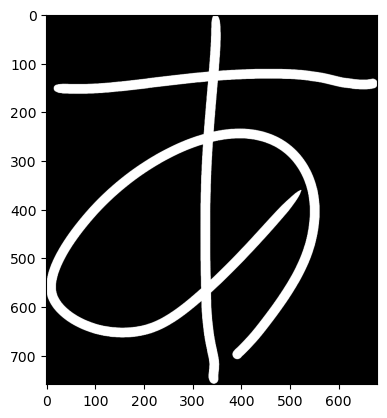

In [21]:
# cropped image before turning back into 28x28 image
crop = inv_sample.crop(bbox)
plt.imshow(crop, cmap=plt.cm.Greys_r);

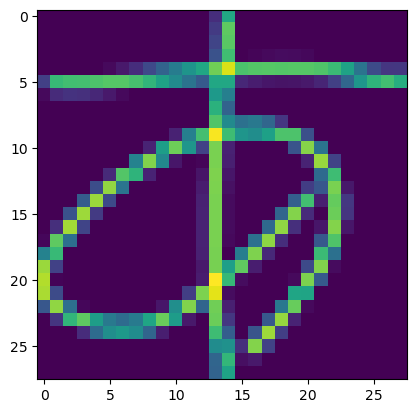

In [22]:
#Now resize down to a 28x28 image
resized_img = crop.resize((28,28))

plt.imshow(resized_img);

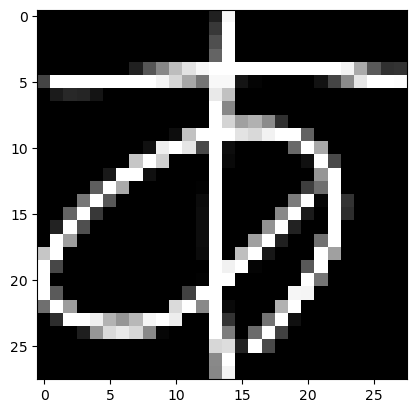

In [23]:
# enhancing the image again
resized_img2 = ImageEnhance.Contrast(resized_img).enhance(2)
plt.imshow(resized_img2, cmap=plt.cm.Greys_r);

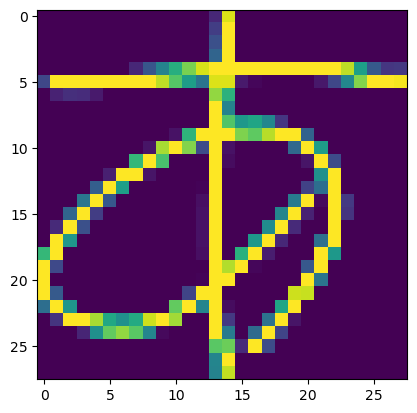

In [24]:
plt.imshow(resized_img2)

In [25]:
# after lowering resolution
print(f'Image details')
print(f'Format {resized_img2.format}')
print(f'Size {resized_img2.size}')
print(f'Mode {resized_img2.mode}')

Image details
Format None
Size (28, 28)
Mode L


<a name='prepare3'></a>
## 3.B Preparing the Rest of the Dataset

In [26]:
# First for the self written dataset

resized_list_self = []
for image in df_self['image']: 
    bw_image = image.convert("L")
    bw_image2 = ImageEnhance.Contrast(bw_image).enhance(2)
    inv_sample = ImageOps.invert(bw_image2)
    bbox = inv_sample.getbbox()
    crop = inv_sample.crop(bbox)
    resized_img = crop.resize((28, 28))
    resized_img2 = ImageEnhance.Contrast(resized_img).enhance(2)
    resized_list_self.append(resized_img2)

In [27]:
# adding images to the dataset
df_self['resized_image'] = resized_list_self
df_self.head()

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None


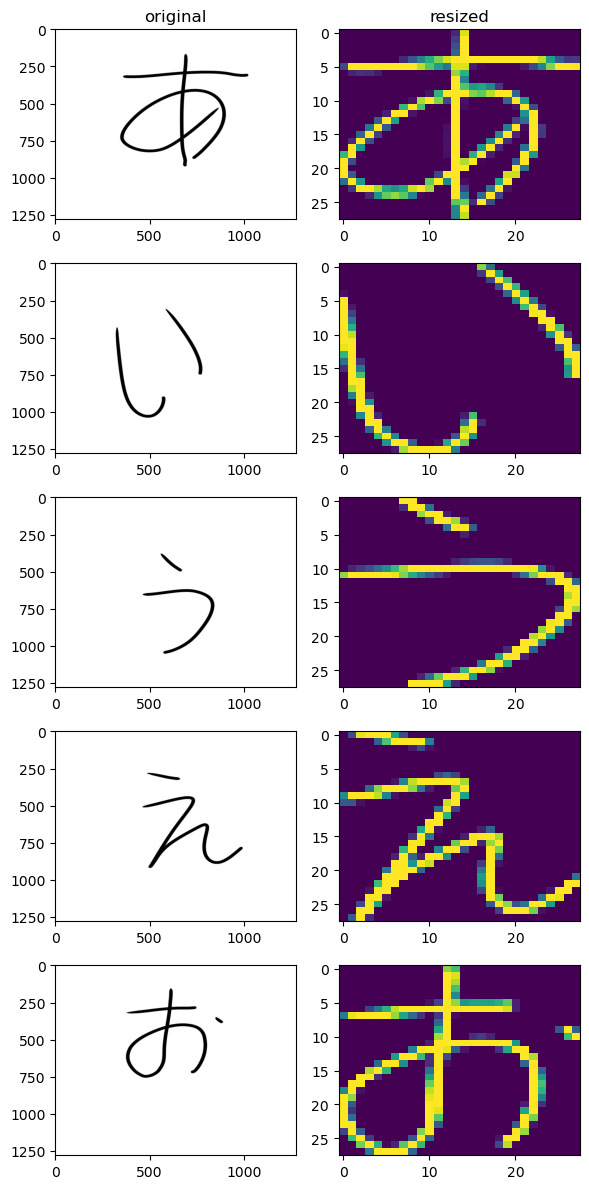

In [28]:
# comparing first 5 original characters to their edited versions
f, ax = plt.subplots(5, 2, figsize = (6, 12))       

ax[0, 0].set_title('original')
ax[0, 0].imshow(df_self['image'][0], aspect = 'auto')
ax[1, 0].imshow(df_self['image'][14], aspect = 'auto')
ax[2, 0].imshow(df_self['image'][14*2], aspect = 'auto')
ax[3, 0].imshow(df_self['image'][14*3], aspect = 'auto')
ax[4, 0].imshow(df_self['image'][14*4], aspect = 'auto')

ax[0, 1].set_title('resized')
ax[0, 1].imshow(df_self['resized_image'][0], aspect = 'auto')
ax[1, 1].imshow(df_self['resized_image'][14], aspect = 'auto')
ax[2, 1].imshow(df_self['resized_image'][14*2], aspect = 'auto')
ax[3, 1].imshow(df_self['resized_image'][14*3], aspect = 'auto')
ax[4, 1].imshow(df_self['resized_image'][14*4], aspect = 'auto')

plt.tight_layout()

In [29]:
# Now for the other written dataset
resized_list_other = []
for image in df_other['image']: 
    bw_image = image.convert("L")
    bw_image2 = ImageEnhance.Contrast(bw_image).enhance(2)
    inv_sample = ImageOps.invert(bw_image2)
    bbox = inv_sample.getbbox()
    crop = inv_sample.crop(bbox)
    resized_img = crop.resize((28, 28))
    resized_list_other.append(resized_img)

In [30]:
# adding images to the dataset
df_other['resized_image'] = resized_list_other
df_other.head()

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,i,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,u,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,e,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,o,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",None


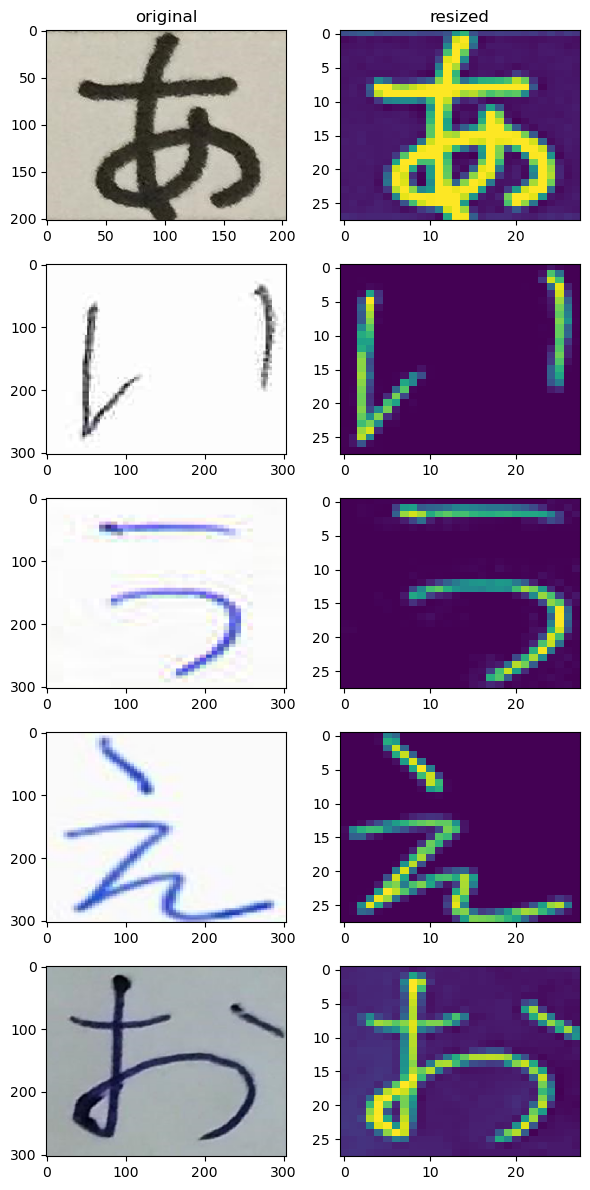

In [31]:
# comparing first 5 original characters to their edited versions
f, ax = plt.subplots(5, 2, figsize = (6, 12))       

ax[0, 0].set_title('original')
ax[0, 0].imshow(df_other['image'][0], aspect = 'auto')
ax[1, 0].imshow(df_other['image'][1*46 + 1], aspect = 'auto')
ax[2, 0].imshow(df_other['image'][2*46 + 2], aspect = 'auto')
ax[3, 0].imshow(df_other['image'][3*46 + 3], aspect = 'auto')
ax[4, 0].imshow(df_other['image'][4*46 + 4], aspect = 'auto')

ax[0, 1].set_title('resized')
ax[0, 1].imshow(df_other['resized_image'][0], aspect = 'auto')
ax[1, 1].imshow(df_other['resized_image'][1*46 + 1], aspect = 'auto')
ax[2, 1].imshow(df_other['resized_image'][2*46 + 2], aspect = 'auto')
ax[3, 1].imshow(df_other['resized_image'][3*46 + 3], aspect = 'auto')
ax[4, 1].imshow(df_other['resized_image'][4*46 + 4], aspect = 'auto')

plt.tight_layout()

<a name='prepare4'></a>
## 3.C Merging Datasets

In [32]:
df_joined = pd.concat([df_self, df_other], ignore_index=True)
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None


In [33]:
# shapes for each dataframe
df_self.shape, df_other.shape

((644, 5), (414, 5))

In [34]:
# shape for combined dataframe
df_joined.shape 

(1058, 5)

In [35]:
# should be 23 each
df_joined['label'].value_counts()

a      23
mo     23
ha     23
hi     23
fu     23
he     23
ho     23
ma     23
mi     23
mu     23
me     23
ya     23
i      23
yu     23
yo     23
ra     23
ri     23
ru     23
re     23
ro     23
wa     23
wo     23
no     23
ne     23
nu     23
ni     23
u      23
e      23
o      23
ka     23
ki     23
ku     23
ke     23
ko     23
sa     23
shi    23
su     23
se     23
so     23
ta     23
chi    23
tsu    23
te     23
to     23
na     23
n      23
Name: label, dtype: int64

<a name='#imagedata1'></a>
# 4. Converting Images into Numerical Data

In [36]:
# getting the numerical output for the image data
# the zeros stand for "empty" black background
# any number shows how white or filled in a pixel is (255 indicates fully white/filled in)

np.array(df_self['resized_image'][0].getdata())

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        28, 242,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  46, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  62, 255,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  82, 255,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  28,  68, 114, 160, 204, 240, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 230, 144,  72,  40,  42,  54, 255, 255,
       255, 255, 255, 255, 255, 255, 230, 188, 142,  98, 242, 242,  18,
         4,   0,   0,   0,   0,  16,  54, 118, 208, 255, 255, 252,   0,
        24,  34,  32,  18,   0,   0,   0,   0,   0,   0,   0,   

In [37]:
# adding numerical Image data to dataframe
for i in range(len(df_joined)):
    df_joined.loc[i, 'numerical_image'] = df_joined['resized_image'][i].getdata()

In [38]:
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 24..."
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 172..."
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121..."
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41, 167, ..."
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


<a name='eda1'></a>
# 5. Exploratory Data Analysis (EDA)

<a name='eda2'></a>
## 5.A Checking that every image has values in it (to ensure none are blank)

In [39]:
# finding average of each image's numerical data
# can consider an image blank if the average of values are well below a threshold

avg_list = []
for i in range(len(df_joined)):
    avg_list.append(np.average(df_joined.loc[i, 'numerical_image']))

# average of the average numerical count of each image (the average of how filled in each image is)   
np.average(avg_list)

45.5644072373751

In [40]:
# 3 images with lowest average image data
sorted(avg_list)[0:3]

[1.8035714285714286, 11.238520408163266, 11.681122448979592]

In [41]:
# now checking if any images are near or close to 0 (meaning they're basically empty)
threshold = 12.0
empty_list = []
for i in range(len(df_joined)):
    if np.average(df_joined.loc[i, 'numerical_image']) <= threshold:       
        empty_list.append(i)
        
empty_list

[735, 737, 763]

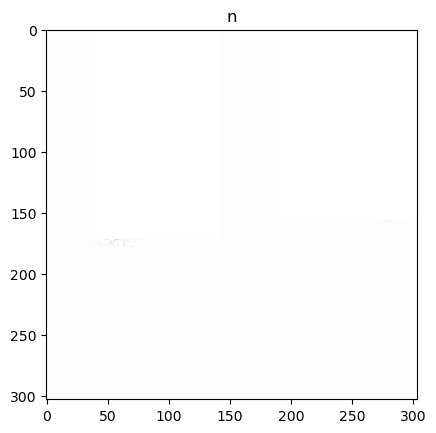

In [42]:
plt.title(str(df_joined.loc[735, 'label']))
plt.imshow(df_joined.loc[735, 'image']);

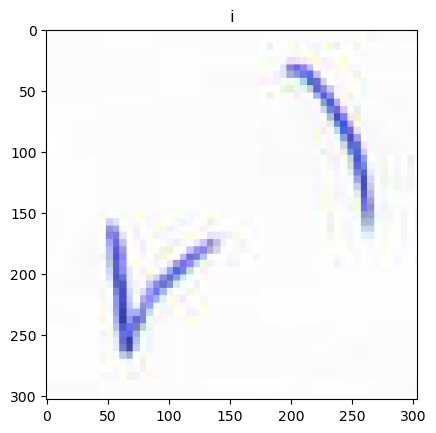

In [43]:
plt.title(str(df_joined.loc[737, 'label']))
plt.imshow(df_joined.loc[737, 'image']);

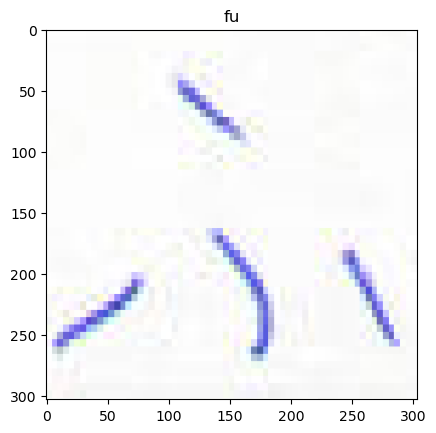

In [44]:
plt.title(str(df_joined.loc[763, 'label']))
plt.imshow(df_joined.loc[763, 'image']);

- Definitely an empty image
- Looking back at original images, this specific character was never drawn
- Can try to impute by averaging other images for that character (should be 9)

<a name='missing1'></a>
### 5.A.a Using Imputation for the empty character

In [45]:
empty_label = df_joined.loc[735, 'label']

# getting all images that match the label of the blank image
empty_df = df_joined.query(f"label == '{empty_label}'").drop(735, axis=0).reset_index(drop = True) 
empty_df

,label,image,resized_image,one_hot_label,numerical_image
0,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 66, 0, 0..."
1,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 253, 1, 0..."
2,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 255..."
3,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 203, 87, 0, ..."
4,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 223, 4..."
5,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 238..."
6,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100..."
7,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205..."
8,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [46]:
# now to average all other images to create new image
impute_img = [0 for i in range(28*28)]
for i in range(len(empty_df)):
    img = np.array(empty_df.loc[i, 'numerical_image'])
    impute_img += img
    
impute_img = impute_img/len(empty_df)
impute_img

array([  9.90909091,   9.63636364,   9.72727273,   9.72727273,
         9.90909091,  10.09090909,  10.        ,   9.72727273,
        16.40909091,  35.86363636,  31.09090909,  30.63636364,
        29.59090909,  19.81818182,  47.81818182,  34.86363636,
        32.90909091,  40.54545455,  36.        ,  21.31818182,
         9.36363636,   9.72727273,   9.86363636,   9.36363636,
         9.18181818,   9.31818182,   9.59090909,   9.31818182,
         9.90909091,   9.86363636,   9.77272727,   9.90909091,
        10.22727273,  14.68181818,  12.90909091,  10.        ,
        27.81818182,  55.90909091,  44.77272727,  55.59090909,
        33.59090909,  47.63636364,  55.90909091,  39.5       ,
        52.36363636,  45.40909091,  27.95454545,  13.90909091,
         9.72727273,   9.72727273,   9.54545455,   9.45454545,
         9.40909091,   9.59090909,   9.45454545,   9.40909091,
         9.90909091,   9.95454545,   9.81818182,  10.        ,
        10.40909091,  15.72727273,  14.40909091,  11.90

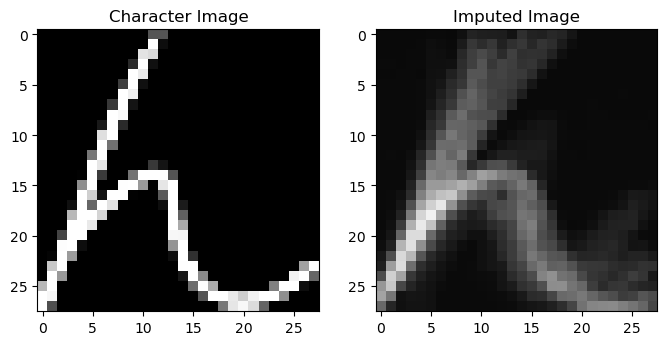

In [47]:
# showing the newly created image to see if it actually matches with the intended character
f, ax = plt.subplots(1, 2, figsize = (8, 16)) 

ax[0].set_title('Character Image')
ax[0].imshow(empty_df.loc[0, 'resized_image'], cmap = plt.cm.Greys_r)

img_array = []
for i in range(28):
    start = i*28
    end = (i+1)*28
    img_array.append(impute_img[start:end])
    
img_array = np.array(img_array)    
img = Image.fromarray(img_array)
ax[1].set_title('Imputed Image')
ax[1].imshow(img);

- That's definitely the correct character
- Doesn't look as solid as the other images, but probably better than a blank image

<a name='eda3'></a>
## 5.B Outlier Detection

<a name='outlier1'></a>
### 5.B.a Checking the average pixels within class (for each character)

In [48]:
avg_list = []
for i in range(len(df_joined)):
    avg_list.append(np.average(df_joined.loc[i, 'numerical_image']))


df_joined['image_data_avg'] = avg_list

In [49]:
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 24...",46.661990
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 172...",44.019133
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121...",41.334184
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41, 167, ...",41.693878
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",43.169643


In [50]:
# changing to dict for ease of data entry
avg_dict = df_joined.groupby('label')['image_data_avg'].agg('mean').to_dict()
avg_dict

{'a': 50.57081854480923,
 'chi': 46.14734915705412,
 'e': 41.46844498669033,
 'fu': 30.724046140195206,
 'ha': 49.22970275066548,
 'he': 35.17419032830524,
 'hi': 44.671916592724045,
 'ho': 50.83457187222716,
 'i': 33.17602040816326,
 'ka': 41.61690328305235,
 'ke': 39.35714285714286,
 'ki': 49.80745341614907,
 'ko': 35.036157941437445,
 'ku': 32.48724489795918,
 'ma': 54.274068322981364,
 'me': 63.33928571428571,
 'mi': 50.21129103815439,
 'mo': 47.77251552795031,
 'mu': 45.755712067435674,
 'n': 41.461790150842944,
 'na': 47.45092058562555,
 'ne': 53.66964285714286,
 'ni': 38.973768855368235,
 'no': 57.41864463176575,
 'nu': 60.506599378881994,
 'o': 45.76713620230701,
 'ra': 44.836235581189,
 're': 51.34549689440994,
 'ri': 40.89746007098491,
 'ro': 49.25687666370896,
 'ru': 57.1444653948536,
 'sa': 45.65849600709849,
 'se': 49.27928127772849,
 'shi': 33.21650399290151,
 'so': 51.34128216503993,
 'su': 40.69698314108252,
 'ta': 42.80529059449867,
 'te': 43.18982919254658,
 'to': 40.

In [51]:
# now the standard deviation
std_dict = df_joined.groupby('label')['image_data_avg'].agg('std').to_dict()
std_dict

{'a': 19.29087781131455,
 'chi': 17.623974769014065,
 'e': 15.535660669150449,
 'fu': 19.64990344791158,
 'ha': 19.16754308669982,
 'he': 21.050017341411277,
 'hi': 17.891908606229222,
 'ho': 18.746127391033994,
 'i': 20.493733135746773,
 'ka': 16.335138773334375,
 'ke': 15.908938721875494,
 'ki': 18.211125570184667,
 'ko': 15.414934122528448,
 'ku': 18.15365667198748,
 'ma': 20.674037182260665,
 'me': 16.318892043182295,
 'mi': 21.308860189117542,
 'mo': 20.139312437405355,
 'mu': 17.94419851051559,
 'n': 28.21296504247976,
 'na': 17.412381857377348,
 'ne': 16.931851723664497,
 'ni': 18.70145030775132,
 'no': 17.907624435722546,
 'nu': 18.151513324240103,
 'o': 14.788168922077343,
 'ra': 25.196839351053683,
 're': 20.14085677969469,
 'ri': 25.980995028405264,
 'ro': 20.16521827323621,
 'ru': 20.758684675977307,
 'sa': 17.473900644232423,
 'se': 17.406583285324366,
 'shi': 19.364735249078745,
 'so': 17.630323685457938,
 'su': 19.005844568685745,
 'ta': 16.578500192956923,
 'te': 17.886

In [52]:
# entering data into dataframe
df_joined['character_avg'] = 0
df_joined['character_std'] = 0
for i in range(len(df_joined)):
    label = df_joined.loc[i, 'label']
    df_joined.loc[i, 'character_avg'] = avg_dict[label]
    df_joined.loc[i, 'character_std'] = std_dict[label]
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 24...",46.661990,50.570819,19.290878
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 172...",44.019133,50.570819,19.290878
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121...",41.334184,50.570819,19.290878
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41, 167, ...",41.693878,50.570819,19.290878
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",43.169643,50.570819,19.290878


In [53]:
# now to test for any outliers
# an outlier could show incorrect label assignments, or incorrect image enhancement
# we'll be using the z-score and 2 standard deviations (95%) from the mean to determine an outlier
outlier_list = []
for i in range(len(df_joined)):
    x = df_joined.loc[i, 'image_data_avg']  
    mu = df_joined.loc[i, 'character_avg']
    sigma = df_joined.loc[i, 'character_std']
    z_score = (x-mu)/sigma
    if z_score <= -2.5 or z_score >= 2.5:
        outlier_list.append(i)
        
outlier_list

[676,
 829,
 830,
 831,
 832,
 833,
 835,
 836,
 837,
 839,
 840,
 845,
 847,
 849,
 854,
 855,
 856,
 870,
 920,
 921,
 926,
 942,
 944,
 1057]

In [54]:
df_outlier = df_joined.loc[outlier_list, :]
df_joined = df_joined.drop(outlier_list)

df_outlier

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
676,mu,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(35, 37, 36, 32, 31, 29, 31, 33, 33, 33, 31, 3...",92.432398,45.755712,17.944199
829,i,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(70, 71, 69, 67, 68, 69, 72, 70, 69, 67, 65, 6...",85.229592,33.176020,20.493733
830,u,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(67, 68, 68, 69, 69, 68, 68, 68, 68, 69, 70, 7...",87.213010,37.282387,15.849187
831,e,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(70, 72, 74, 75, 74, 76, 78, 76, 74, 72, 71, 6...",89.424745,41.468445,15.535661
832,o,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(69, 69, 72, 73, 72, 72, 73, 68, 60, 64, 67, 6...",90.002551,45.767136,14.788169
833,ka,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(66, 64, 62, 63, 63, 65, 65, 67, 66, 68, 69, 6...",84.775510,41.616903,16.335139
835,ku,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(68, 65, 66, 67, 68, 65, 62, 66, 69, 71, 70, 7...",85.721939,32.487245,18.153657
836,ke,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(70, 68, 67, 66, 64, 66, 68, 67, 66, 69, 69, 7...",88.283163,39.357143,15.908939
837,ko,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(86, 83, 83, 79, 80, 76, 78, 79, 77, 75, 72, 6...",85.716837,35.036158,15.414934
839,shi,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(78, 74, 73, 72, 71, 71, 70, 72, 73, 75, 75, 7...",84.563776,33.216504,19.364735


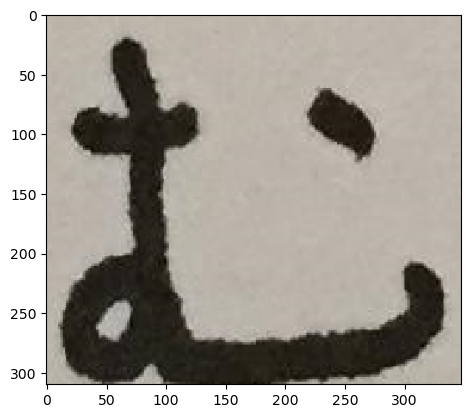

In [55]:
# checking first outlier image
plt.imshow(df_outlier.loc[outlier_list[0], 'image']);

- It looks like because the paper used was colored, it adds values to the background image of each character

<a name='outlier2'></a>
### 5.B.b Checking each image to ensure it was labeled correctly

In [56]:
# Setting up an iterator to quickly scan through all images
outlier_iter = iter(outlier_list)

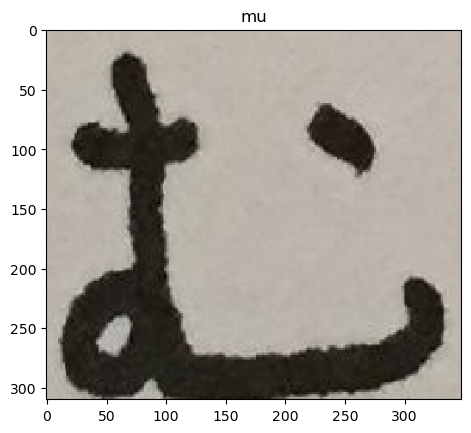

In [57]:
# checking each image to see if it was correctly labeled
k = next(outlier_iter)
label = df_outlier.loc[k, 'label']
plt.title(label)

plt.imshow(df_outlier.loc[k, 'image']);

- all images in the outlier list are correctly labeled
- Can keep raising the threshold of what pixels get set to zero

<a name='outlier3'></a>
### 5.B.c Setting the low level background values to zero

In [58]:
# testing on one character
outlier_img_data = df_outlier.loc[outlier_list[0], 'numerical_image']
#outlier_img_data = df_joined.loc[4, 'numerical_image']
test_array = np.array(outlier_img_data)
test_array[test_array < 100] = 0

test_array

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 131, 248, 151,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 180, 255, 218,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
       255, 243,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 253, 255, 140,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 209, 255, 181,   0,   0,   0,   0,   

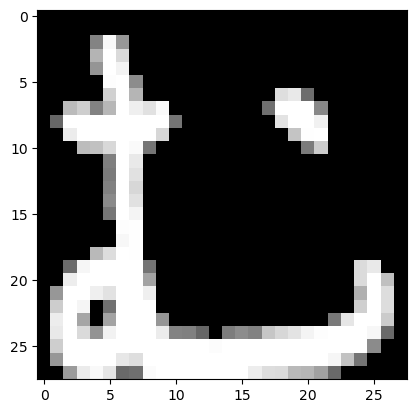

In [59]:
# reconstructing to check new image
img_list = []
for i in range(28):
    start = i*28
    end = (i+1)*28
    img_list.append(test_array[start:end])
    
img_array = np.array(img_list)    
img = Image.fromarray(img_array)
plt.imshow(img);

- Looks a lot better
- Can do this for every outlier character

In [60]:
# starting from a value of 10 and increasing until every image is removed from being an outlier
df_outlier_copy = df_outlier.copy()
outlier_list = df_outlier.index
for threshold in range(10, 200, 5):
    for i in outlier_list:
        outlier_img_data = df_outlier.loc[i, 'numerical_image']
        test_array = np.array(outlier_img_data)
        test_array[test_array < threshold] = 0
        df_outlier.at[i, 'numerical_image'] = test_array
        
    avg_list_outlier = []
    for i in df_outlier.index:
        avg_list_outlier.append(np.average(df_outlier.loc[i, 'numerical_image'])) 
    df_outlier['image_data_avg'] = avg_list_outlier

    outlier_list = []
    for i in df_outlier.index:
        x = df_outlier.loc[i, 'image_data_avg']  
        mu = df_outlier.loc[i, 'character_avg']
        sigma = df_outlier.loc[i, 'character_std']
        z_score = (x-mu)/sigma
        if z_score <= -1.0 or z_score >= 1.0:
            outlier_list.append(i)
            
    if len(outlier_list) == 0:
        break

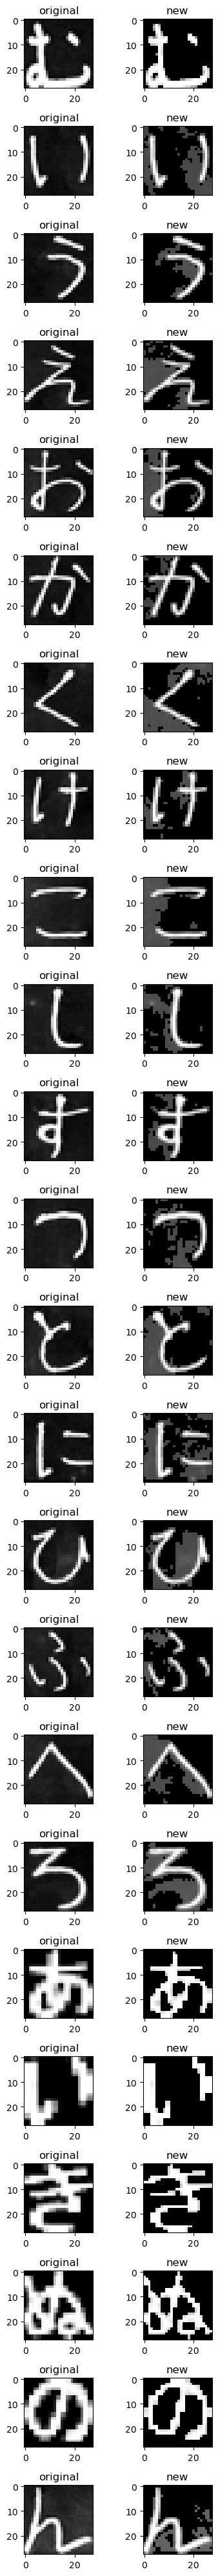

In [61]:
# spot checking new images against the originals
f, ax = plt.subplots(len(df_outlier), 2, figsize = (4, 40))      

np.random.seed(1)
#test_index = iter(np.random.choice(df_outlier.index, 10, replace = False))
test_index = iter(df_outlier.index)
for i in range(len(df_outlier.index)):
    img_index = next(test_index)
    
    ax[i, 0].set_title("original")
    ax[i, 0].imshow(df_outlier.loc[img_index, 'resized_image'], cmap=plt.cm.Greys_r)

    test_array = df_outlier.loc[img_index, 'numerical_image']
    img_list = []
    for j in range(28):
        start = j*28
        end = (j+1)*28
        img_list.append(test_array[start:end])
    
    img_array = np.array(img_list)    
    img = Image.fromarray(img_array)
    ax[i, 1].set_title("new")
    ax[i, 1].imshow(img)
    
plt.tight_layout();

- Everything is still readable
- There are obviously more pixels that could be brought down to zero, but I wanted to limit how much bias I'm asserting
- The goal was to just convert each image to prevent outliers

<a name='outlier4'></a>
### 5.B.d Merging the outlier Dataframe back into main Dataframe

In [62]:
df_joined = pd.concat([df_joined, df_outlier])
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 24...",46.661990,50.570819,19.290878
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 172...",44.019133,50.570819,19.290878
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121...",41.334184,50.570819,19.290878
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41, 167, ...",41.693878,50.570819,19.290878
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",43.169643,50.570819,19.290878


In [63]:
df_joined.shape

(1058, 8)

<a name='eda4'></a>
## 5.C Dividing the Image Data by 255

In [64]:
# This is done to keep all values between 0 and 1 for easier calculations
for i in range(len(df_joined)):
    image = df_joined.loc[i, 'numerical_image']
    df_joined.at[i, 'numerical_image'] = np.array(image).reshape(1, -1)/255
    
df_joined.loc[0, 'numerical_image']

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10980392, 0.94901961,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.18039216, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.24313725,
        1.        , 0.        , 0.        , 0.  

<a name='split1'></a>
# 6. Splitting Data

<a name='split2'></a>
## 6.A Train-test split

In [65]:
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",46.661990,50.570819,19.290878
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",44.019133,50.570819,19.290878
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",41.334184,50.570819,19.290878
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",41.693878,50.570819,19.290878
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",43.169643,50.570819,19.290878


In [66]:
df_joined.shape

(1058, 8)

In [67]:
# sorting values to keep common labels together
df_joined = df_joined.sort_values(by = ['label']).reset_index(drop=True)
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",46.661990,50.570819,19.290878
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.23921568627450981, 0.23529411764705882, 0....",88.154337,50.570819,19.290878
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",35.186224,50.570819,19.290878
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.00392156862745098, 0.007843...",69.793367,50.570819,19.290878
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.27...",42.928571,50.570819,19.290878


In [68]:
# Reformatting data to use with Tensorflow
X_list = df_joined['numerical_image']
Y_list = df_joined['one_hot_label']

X = []
for k in range(len(X_list)):
    X.append(X_list[k][0])
    
X = np.array(X)
X = X.reshape(len(X), 28, 28)

Y = []
for k in range(len(Y_list)):
    Y.append(Y_list[k])
    
Y = np.array(Y)

In [69]:
# taking a random selection of each character for the training and testing sets
np.random.seed(1)

X_train = []
X_val = []
X_test = []

y_train = []
y_val = []
y_test = []

# adding random rows from each dataset into the training and test datasets
for i in range(len(df_joined['label'].unique())):
    
    # from the self dataframe
    index_array = np.random.choice(np.arange(23*i, 23*(i+1)), 23, replace=False)
    X_train.extend(X[index_array[:15]])
    X_val.extend(X[index_array[15:19]])
    X_test.extend(X[index_array[19:]])
    
    y_train.extend(Y[index_array[:15]])
    y_val.extend(Y[index_array[15:19]])
    y_test.extend(Y[index_array[19:]])

In [70]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [71]:
# ensuring all images are accounted for
print("Train size: " + str(len(X_train)) +
      "\nVal size: " + str(len(X_val)) +
      "\nTest size: " + str(len(X_test)))

Train size: 690
Val size: 184
Test size: 184


<a name='nn1'></a>
# 7. Basic Neural Network

## 7.A Using Tensorflow

In [72]:
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(46)
])

In [74]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [75]:
epochs = 100
history = model.fit(
    x = X_train,
    y = y_train,
    validation_data=(X_val, y_val),
    epochs = epochs)

Epoch 1/100
22/22 [==============================] - 1s 8ms/step - loss: 3.6912 - accuracy: 0.0870 - val_loss: 3.3480 - val_accuracy: 0.2935
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 2.9020 - accuracy: 0.4420 - val_loss: 2.6291 - val_accuracy: 0.5054
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 2.1366 - accuracy: 0.5812 - val_loss: 2.0117 - val_accuracy: 0.6467
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 1.5510 - accuracy: 0.7304 - val_loss: 1.5927 - val_accuracy: 0.7011
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1235 - accuracy: 0.8072 - val_loss: 1.3794 - val_accuracy: 0.7337
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8936 - accuracy: 0.8478 - val_loss: 1.2198 - val_accuracy: 0.7174
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.8681 - val_loss: 1.1434 - val_accuracy: 0.7228
Epoch 8/100
2

Epoch 59/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9986 - val_loss: 0.8002 - val_accuracy: 0.7880
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9942 - val_loss: 0.8334 - val_accuracy: 0.8043
Epoch 61/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9971 - val_loss: 0.8557 - val_accuracy: 0.7826
Epoch 62/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9986 - val_loss: 0.8438 - val_accuracy: 0.7826
Epoch 63/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9957 - val_loss: 0.8320 - val_accuracy: 0.7989
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.8422 - val_accuracy: 0.7935
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9986 - val_loss: 0.8475 - val_accuracy: 0.7826
Epoch 

In [76]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

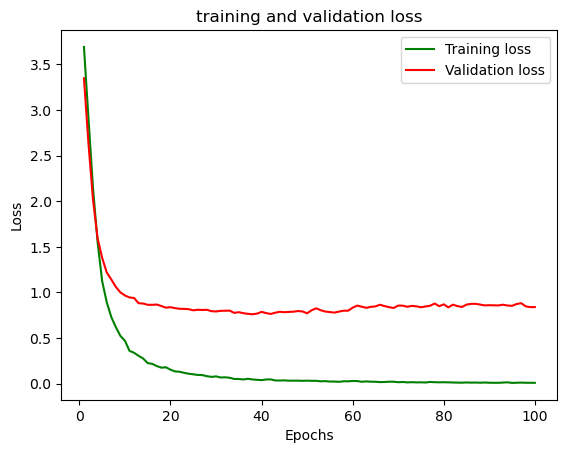

In [77]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'g', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

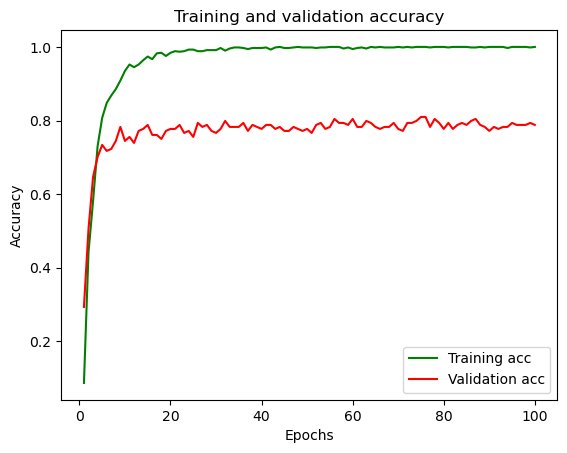

In [78]:
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## 7.B Hyperparameter Tuning

In [80]:
import keras_tuner as kt

In [81]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    
    hp_units = hp.Int('units', min_value = 30, max_value=200, step = 10)
    hp_act_funct = hp.Choice('activation_function', values = ['relu', 'tanh', 'sigmoid'])
    model.add(keras.layers.Dense(units = hp_units, activation = hp_act_funct))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(46))
    
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 2.0])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate),
                  loss = keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
    
    return model

In [82]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                     max_epochs = 100,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'jpn_characters')

INFO:tensorflow:Reloading Tuner from my_dir\jpn_characters\tuner0.json


In [83]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [84]:
tuner.search(X_train, y_train, epochs=100, validation_data = (X_val, y_val), callbacks = [stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}. Best activation function is {best_hps.get('activation_function')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 190 and the optimal learning rate for the optimizer
is 0.01. Best activation function is tanh.



# 8. Using Best Model
## 8.A Creating Final Model

In [85]:
hidden_size = best_hps.get('units')
act_funct = best_hps.get('activation_function')
learning_rate = best_hps.get('learning_rate')

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(hidden_size, activation = act_funct),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(46)
])

In [86]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=keras.optimizers.Adam(learning_rate = learning_rate),
              loss=loss_fn,
              metrics=['accuracy'])

In [87]:
epochs = 100
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

history = model.fit(
    x = X_train,
    y = y_train,
    validation_data=(X_val, y_val),
    epochs = epochs,
    callbacks=[stop_early]
)

Epoch 1/100
22/22 [==============================] - 0s 7ms/step - loss: 2.6098 - accuracy: 0.3870 - val_loss: 1.2638 - val_accuracy: 0.6685
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.8377 - val_loss: 0.9690 - val_accuracy: 0.7500
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3101 - accuracy: 0.9232 - val_loss: 0.9703 - val_accuracy: 0.7283
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1983 - accuracy: 0.9493 - val_loss: 0.9648 - val_accuracy: 0.7228
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.9797 - val_loss: 0.9190 - val_accuracy: 0.7446
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9812 - val_loss: 0.8928 - val_accuracy: 0.7500
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9899 - val_loss: 0.8816 - val_accuracy: 0.7609
Epoch 8/100
2

In [88]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

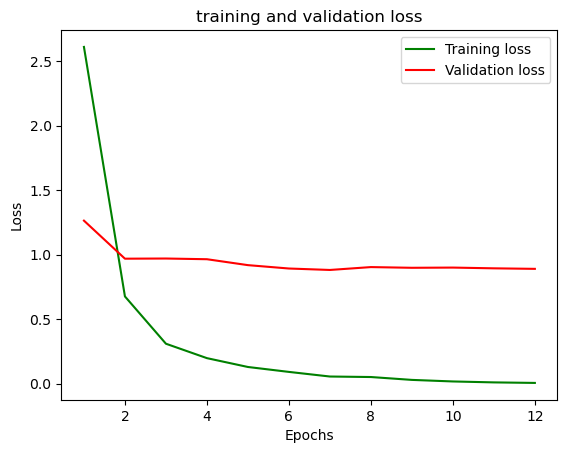

In [89]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'g', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

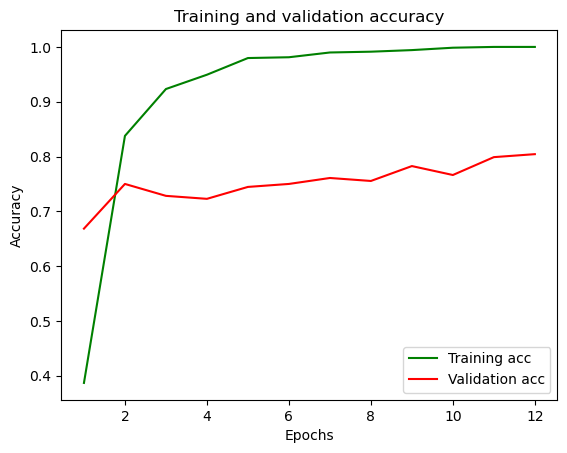

In [90]:
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## 8.B Final Results

In [91]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

6/6 [==============================] - 0s 1ms/step - loss: 0.7677 - accuracy: 0.8152
Loss:  0.7676944136619568
Accuracy:  0.8152173757553101
